In [14]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
plt.rc('figure', figsize=(10, 5))

In [15]:
#alterar eleitores por eleição

eleitores = 94782803

In [16]:
names = ['TRASH1', 'TRASH2', 'TRASH3', 'NR_TURNO', 'TRASH4',
'TRASH5', 'TRASH6', 'TRASH7', 'TRASH8', 'TRASH9', 'TRASH10', 'TRASH11',
'TRASH12', 'NM_URNA_CANDIDATO', 'TRASH13', 'DS_CARGO', 'TRASH14', 'TRASH15',
'TRASH16', 'TRASH17', 'TRASH18', 'TRASH19', 'TRASH20', 'SG_PARTIDO', 'TRASH21',
'TRASH22', 'TRASH23', 'TRASH24', 'QT_VOTOS_NOMINAIS']

In [17]:
df = pd.read_csv('votacao_candidato_munzona_1994_BR.txt', names = names, sep = ';', encoding='latin-1')

In [18]:
df.sample(1)

,TRASH1,TRASH2,TRASH3,NR_TURNO,TRASH4,TRASH5,TRASH6,TRASH7,TRASH8,TRASH9,TRASH10,TRASH11,TRASH12,NM_URNA_CANDIDATO,TRASH13,DS_CARGO,TRASH14,TRASH15,TRASH16,TRASH17,TRASH18,TRASH19,TRASH20,SG_PARTIDO,TRASH21,TRASH22,TRASH23,TRASH24,QT_VOTOS_NOMINAIS
4683,30/03/2016,15:53:17,1994,1,ELEICOES 1994,BR,27278,27278,CAMPO ALEGRE,47,1,12,-1,LEONEL DE MOURA BRIZOLA,#NE#,PRESIDENTE,-1,#NE#,-1,#NE#,4,NAO ELEITO,12,PDT,PARTIDO DEMOCRATICO TRABALHISTA,-1,#NULO#,#NE#,77


In [19]:

droplist = ['TRASH1', 'TRASH2', 'TRASH3', 'TRASH4',
'TRASH5', 'TRASH6', 'TRASH7', 'TRASH8', 'TRASH9', 'TRASH10', 'TRASH11',
'TRASH12', 'TRASH13', 'TRASH14', 'TRASH15',
'TRASH16', 'TRASH17', 'TRASH18', 'TRASH19', 'TRASH20', 'TRASH21',
'TRASH22', 'TRASH23', 'TRASH24']




In [20]:
df = df.drop(droplist, axis = 1)

In [21]:
df.sample(2)

,NR_TURNO,NM_URNA_CANDIDATO,DS_CARGO,SG_PARTIDO,QT_VOTOS_NOMINAIS
4536,1,FERNANDO HENRIQUE CARDOSO,PRESIDENTE,PSDB,1264
10108,1,CARLOS ANTONIO GOMES,PRESIDENTE,PRN,73


### Filtro por Cargo

In [22]:
dfpresidente = df[df.DS_CARGO == 'PRESIDENTE']

# Primeiro Turno

In [23]:
#Escolher Turno
dfpresidente1turno = dfpresidente[dfpresidente.NR_TURNO == 1]
#Grupar por
votostotais1turno = dfpresidente1turno.groupby(['SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS'].sum().reset_index()
#Coluna Porcentagem
votostotais1turno['Porcentagem'] = votostotais1turno['QT_VOTOS_NOMINAIS']/eleitores * 100
#Ordenar
votostotais1turno = votostotais1turno.sort_values(by='QT_VOTOS_NOMINAIS',ascending = False)
#Votos Totais 1 Turno
v1 = votostotais1turno.QT_VOTOS_NOMINAIS.sum()

In [24]:
#Criação de Outros e mostrando somente os 5 primeiros

outros1 = votostotais1turno.QT_VOTOS_NOMINAIS[5:100].sum()
outros1p = votostotais1turno.Porcentagem[5:100].sum()

votostotais1turno = votostotais1turno[0:5].append({'SG_PARTIDO' : 'Outros' , 'NM_URNA_CANDIDATO' : 'Outros', 'QT_VOTOS_NOMINAIS' : outros1, 'Porcentagem' : outros1p } , ignore_index=True)

votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PSDB,FERNANDO HENRIQUE CARDOSO,19868488,20.962123
1,PT,LUIZ INACIO LULA DA SILVA,10797395,11.391724
2,PRONA,ENEAS FERREIRA CARNEIRO,2737402,2.888079
3,PMDB,ORESTES QUERCIA,1985369,2.094651
4,PPR,ESPERIDIAO AMIN HELOU FILHO,1307469,1.379437
5,Outros,Outros,1380134,1.456102


([<matplotlib.patches.Wedge at 0x28e2b250708>,
 [Text(-1.047984857308466, 0.33425699521798247, 'Votos Totais'),
  Text(1.1432561738324323, -0.36464410182262386, 'Não Votaram')],
 [Text(-0.5716281039864359, 0.1823219973916268, '40.2%'),
  Text(0.6668994347355853, -0.21270905939653056, '59.8%')])

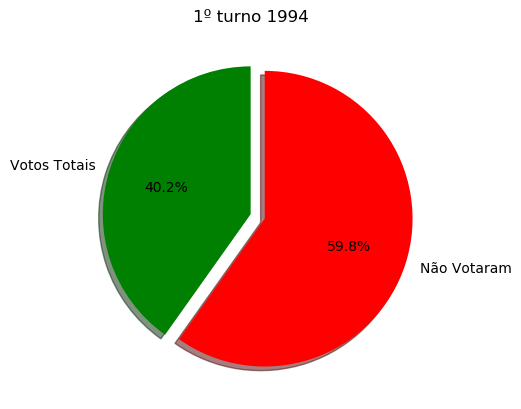

In [25]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()
labels = 'Votos Totais', 'Não Votaram'
sizes = [v1, (eleitores-v1)]
explode = (0.0, 0.1)
colors = ('g','r')
plt.pyplot.title('1º turno 1994')
plt.pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)


([<matplotlib.patches.Wedge at 0x28e2b393ac8>,
 [Text(-1.1971848313309668, -0.08214913043389091, 'FERNANDO HENRIQUE CARDOSO'),
  Text(0.9418335786340594, -0.5682864683919205, 'LUIZ INACIO LULA DA SILVA'),
  Text(0.9238140640246457, 0.5971327952057799, 'ENEAS FERREIRA CARNEIRO'),
  Text(0.6847884643941685, 0.9854261814223715, 'ORESTES QUERCIA'),
  Text(0.5599037684899426, 1.6051503886025014, 'ESPERIDIAO AMIN HELOU FILHO'),
  Text(0.18180172223988567, 1.589637736652792, 'Outros')],
 [Text(-0.6983578182763973, -0.047920326086436364, '52.2%'),
  Text(0.5137274065276687, -0.30997443730468394, '28.4%'),
  Text(0.5038985803770795, 0.32570879738497077, '7.2%'),
  Text(0.399459937563265, 0.5748319391630501, '5.2%'),
  Text(0.3952261895223124, 1.1330473331311774, '3.4%'),
  Text(0.12498868403992139, 1.0928759439487945, '3.6%')])

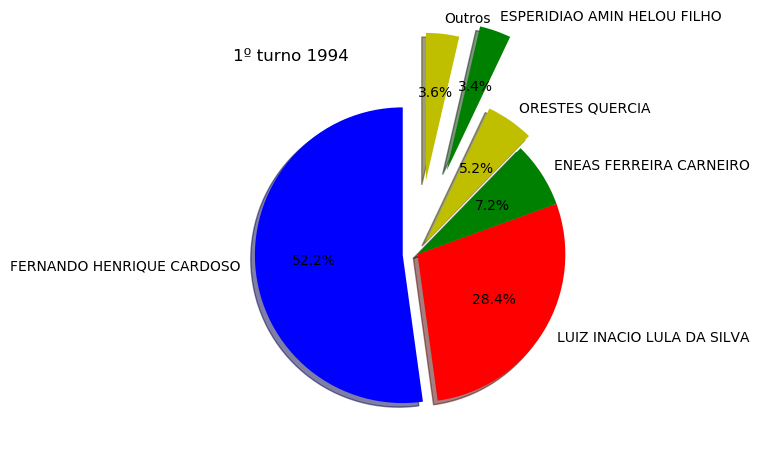

In [28]:
#Grafico de Pizza
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()
labels = votostotais1turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()
explode = (0.1, 0.0, 0.0, 0.1, 0.6, 0.5)
colors = ('b', 'r', 'g', 'y', 'g', 'y')

plt.pyplot.title('1º turno 1994', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode, colors = colors)


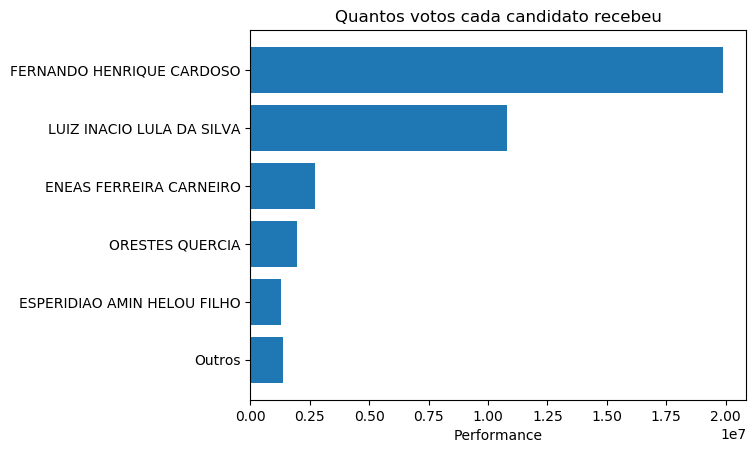

In [29]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais1turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

In [32]:
votostotais1turno = votostotais1turno.append({'SG_PARTIDO' : 'Não Votaram' , 'NM_URNA_CANDIDATO' : 'Não Votaram', 'QT_VOTOS_NOMINAIS' : (eleitores-v1), 
                                              'Porcentagem' : 100-votostotais1turno.Porcentagem.sum() } , ignore_index=True)
votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PSDB,FERNANDO HENRIQUE CARDOSO,19868488,20.962123
1,PT,LUIZ INACIO LULA DA SILVA,10797395,11.391724
2,PRONA,ENEAS FERREIRA CARNEIRO,2737402,2.888079
3,PMDB,ORESTES QUERCIA,1985369,2.094651
4,PPR,ESPERIDIAO AMIN HELOU FILHO,1307469,1.379437
5,Outros,Outros,1380134,1.456102
6,Não Votaram,Não Votaram,56706546,59.827885


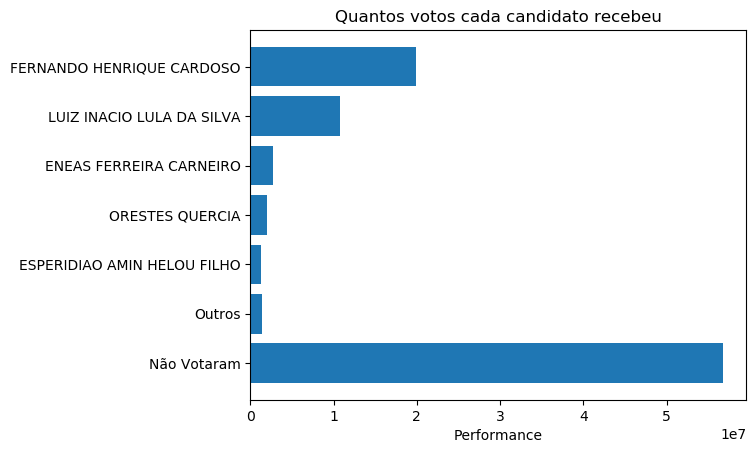

In [33]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais1turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

([<matplotlib.patches.Wedge at 0x28e2b5593c8>,
 [Text(-0.6731630359268109, 0.8699721415435089, 'FERNANDO HENRIQUE CARDOSO'),
  Text(-1.0940366389856575, -0.1143845818148866, 'LUIZ INACIO LULA DA SILVA'),
  Text(-0.9361706228203498, -0.5775678011871495, 'ENEAS FERREIRA CARNEIRO'),
  Text(-0.8346821358437834, -0.7164535798663163, 'ORESTES QUERCIA'),
  Text(-0.7516759272630174, -0.8031085234096842, 'ESPERIDIAO AMIN HELOU FILHO'),
  Text(-0.677248270698179, -0.8667956967107799, 'Outros'),
  Text(1.0479848514405783, -0.334257013615375, 'Não Votaram')],
 [Text(-0.36717983777826046, 0.4745302590237321, '21.0%'),
  Text(-0.5967472576285403, -0.06239159008084723, '11.4%'),
  Text(-0.5106385215383725, -0.3150369824657178, '2.9%'),
  Text(-0.4552811650057, -0.3907928617452634, '2.1%'),
  Text(-0.41000505123437303, -0.4380591945871004, '1.4%'),
  Text(-0.3694081476535521, -0.47279765275133445, '1.5%'),
  Text(0.57162810078577, -0.18232200742656818, '59.8%')])

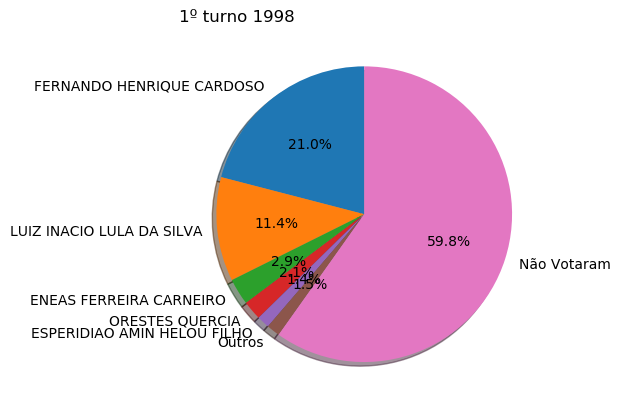

In [34]:
#Grafico de Pizza

labels = votostotais1turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()
# explode = (0.0, 0.1, 0.1

plt.pyplot.title('1º turno 1998', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Salvar os Arquivos CSV

In [35]:
votostotais1turno['Ano'] = 1994
votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem,Ano
0,PSDB,FERNANDO HENRIQUE CARDOSO,19868488,20.962123,1994
1,PT,LUIZ INACIO LULA DA SILVA,10797395,11.391724,1994
2,PRONA,ENEAS FERREIRA CARNEIRO,2737402,2.888079,1994
3,PMDB,ORESTES QUERCIA,1985369,2.094651,1994
4,PPR,ESPERIDIAO AMIN HELOU FILHO,1307469,1.379437,1994
5,Outros,Outros,1380134,1.456102,1994
6,Não Votaram,Não Votaram,56706546,59.827885,1994


In [36]:
votostotais1turno.to_csv('1turno_1994.csv')